IMPORT LIB

In [534]:
import pandas as  pd    
import seaborn as sns
import numpy as np
import plotly.express as px 
import openpyxl
import matplotlib.pyplot as plt

IMPORT DATA

In [535]:
df_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/employee_survey_data.csv')
df_general=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/general_data.csv')
df_in_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/in_time.csv')
df_manager_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/manager_survey_data.csv')
df_out_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/out_time.csv')
dictionary = pd.read_excel('/Users/kalou/Documents/GitHub/rh-analysis/archive/data_dictionary.xlsx')


EXPLO DATA

In [536]:
df_manager_survey

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [537]:
df_manager_survey.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

DF SURVEY

In [538]:
df_survey.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [539]:
df_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [540]:
df_survey_clean=df_survey.dropna()

DF GENERAL

In [541]:
df_general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [542]:
df_general_survey = pd.merge(df_general, df_survey, on='EmployeeID', how='outer')


In [543]:
df_general_final = pd.merge(df_general_survey, df_manager_survey, on='EmployeeID', how='outer')


In [544]:
df_general_final.shape

(4410, 29)

In [545]:
df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [546]:
df_general_survey_clean=df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

In [547]:
df_general_explo = df_general_survey_clean.drop(columns=['Gender', 'Over18', 'EmployeeCount', 'StandardHours'])

In [548]:
def Apercentage(df,column_names):
    results = {}
    for column_name in column_names:
        values = df[column_name].unique()
        for column_value in values:
            yes_counts = df[df[column_name] == column_value]['Attrition'].value_counts().get('Yes', 0)
            total_counts = df[df[column_name] == column_value]['Attrition'].count()
            percentage_of_attrition = yes_counts / total_counts * 100

            results[column_value] = percentage_of_attrition
    
    return results


In [549]:
df_general_explo.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

JOB ROLE EXPLO

In [550]:
JobRole = ['JobRole']
job=Apercentage(df_general_explo,JobRole)
job

{'Healthcare Representative': 14.698162729658792,
 'Research Scientist': 18.424101969872538,
 'Sales Executive': 16.89259645464025,
 'Human Resources': 13.636363636363635,
 'Research Director': 23.949579831932773,
 'Laboratory Technician': 16.18421052631579,
 'Manufacturing Director': 11.214953271028037,
 'Sales Representative': 14.754098360655737,
 'Manager': 13.0}

Text(0.5, 1.0, 'Attrition Rate by Job Role')

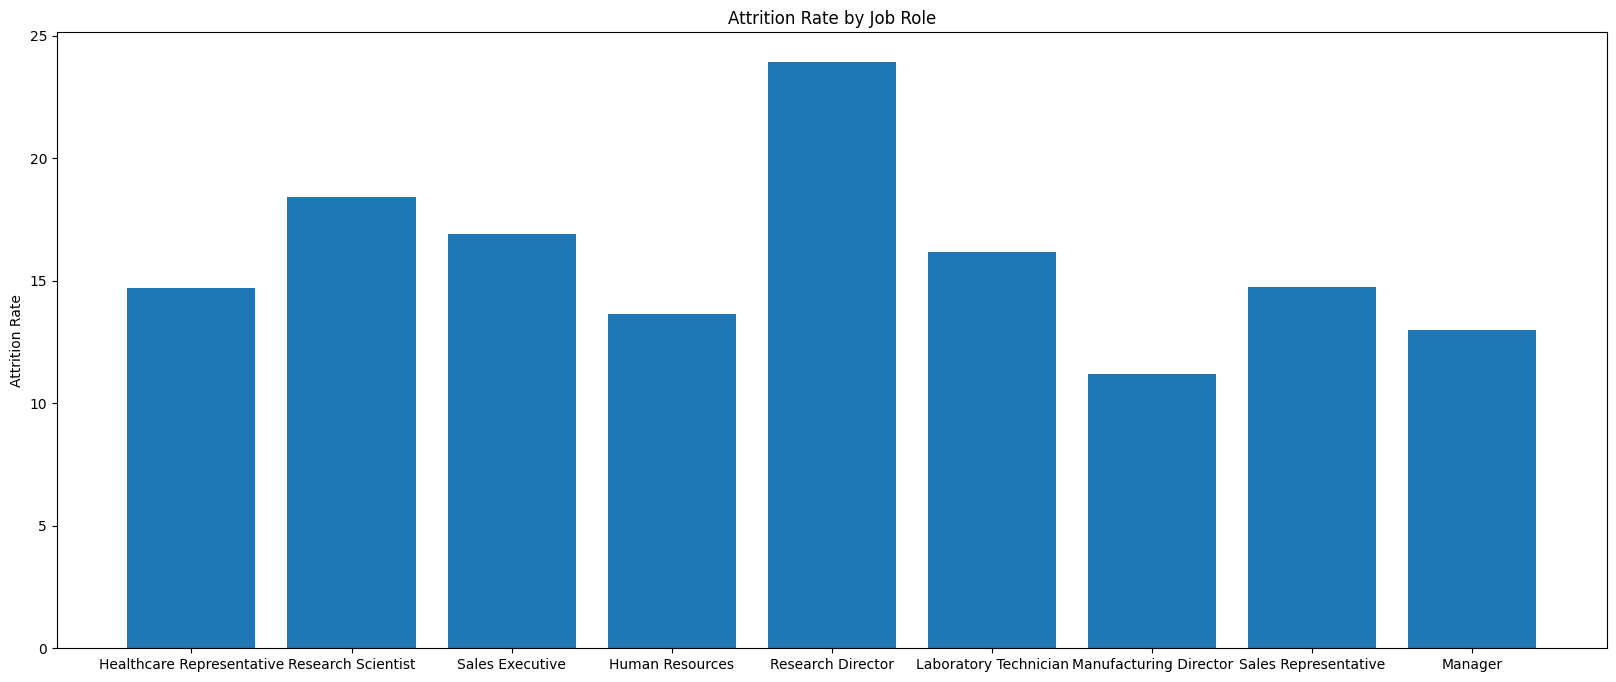

In [551]:
plt.figure(figsize=(20,8))
plt.bar(list(job.keys()), list(job.values()))
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Job Role')


DEPARTMENT EXPLO

In [552]:
Department = ['Department']
dep=Apercentage(df_general_explo,Department)
dep

{'Sales': 15.05703422053232,
 'Research & Development': 15.828611898016998,
 'Human Resources': 29.78723404255319}

Text(0.5, 1.0, 'Attrition Rate by Department')

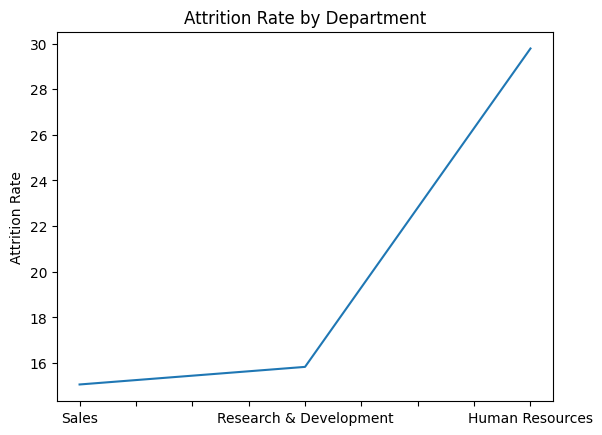

In [553]:
pd.Series(dep).plot()  
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Department')



MARITAL STATUS EXPLO

In [653]:
MaritalStatus = ['MaritalStatus']
Apercentage(df_general_explo,MaritalStatus)

{'Married': 12.7208480565371,
 'Single': 25.522710886806056,
 'Divorced': 9.906152241918665}

Text(0.5, 1.0, 'Attrition Rate by Marital Status')

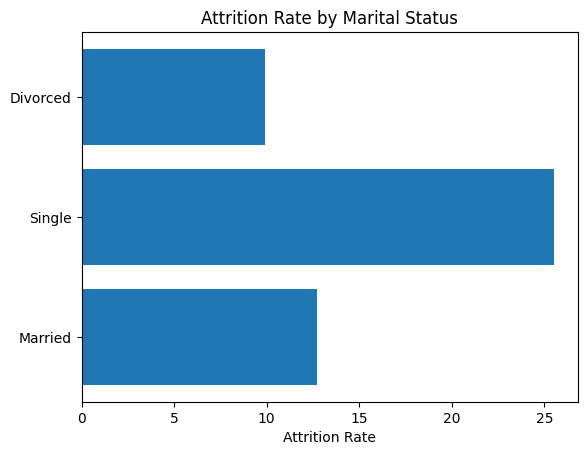

In [555]:
plt.barh(list(status.keys()), list(status.values()))
plt.xlabel('Attrition Rate')
plt.title('Attrition Rate by Marital Status')



BUSINESS TRAVEL EXPLO

In [654]:
BusinessTravel = ['BusinessTravel']
travel_attrition=Apercentage(df_general_explo,BusinessTravel)
travel_attrition

{'Travel_Rarely': 15.081433224755699,
 'Travel_Frequently': 24.785276073619634,
 'Non-Travel': 8.144796380090497}

Text(0.5, 1.0, 'Attrition Rate by Travel Frequency')

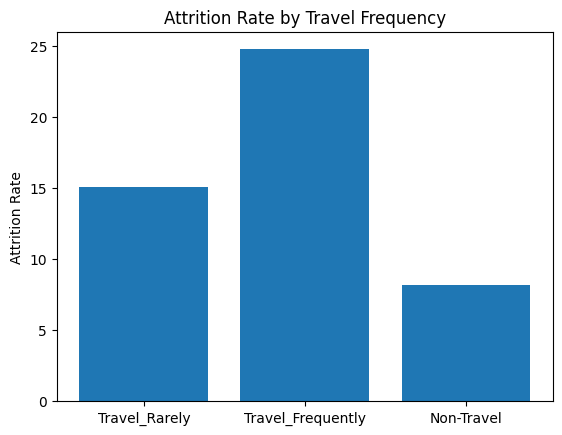

In [557]:
plt.bar(list(travel_attrition.keys()), list(travel_attrition.values()))
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Travel Frequency')


ENVIRONMENT SATISFACTION EXPLO

In [590]:
df_general_explo

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,DurationInPosition
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,6,1,0,0,3.0,4.0,2.0,3,3,1
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,...,3,5,1,4,3.0,2.0,4.0,2,4,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,...,2,5,0,3,2.0,2.0,1.0,3,3,5
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,...,5,8,7,5,4.0,4.0,3.0,2,3,1
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,...,2,6,0,4,4.0,1.0,3.0,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,4405,2,Human Resources,...,2,6,1,5,3.0,4.0,3.0,2,3,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,...,5,3,0,2,4.0,1.0,3.0,3,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,...,2,3,0,2,4.0,4.0,3.0,2,3,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,...,4,4,1,2,1.0,3.0,3.0,3,4,3


In [652]:
EnvironmentSatisfaction = ['EnvironmentSatisfaction']
Apercentage(df_general_explo,EnvironmentSatisfaction)


{3.0: 13.834586466165414,
 2.0: 15.147928994082841,
 4.0: 13.419257012888552,
 1.0: 25.45018007202881}

In [651]:
JobSatisfaction = ['JobSatisfaction']
Apercentage(df_general_explo,JobSatisfaction)



{4.0: 11.400894187779434,
 2.0: 16.50602409638554,
 1.0: 22.91421856639248,
 3.0: 16.56441717791411}

WORK LIFE BALANCE

In [560]:
WorkLifeBalance = ['WorkLifeBalance']
Apercentage(df_general_explo,WorkLifeBalance)

{2.0: 16.55104063429138,
 4.0: 17.96008869179601,
 1.0: 31.223628691983123,
 3.0: 14.4106463878327}

In [561]:
yes_counts_sales = df_general_explo[df_general_explo['JobRole'] == 'Sales Executive']['Attrition'].value_counts().get('Yes', 0)
counts_sales = df_general_explo[df_general_explo['JobRole'] == 'Sales Executive']['Attrition'].count()
Percentage_of_Attrition_sales=yes_counts_sales/counts_sales *100
Percentage_of_Attrition_sales

16.89259645464025

In [562]:
df_general_explo['Department'].value_counts()

Department
Research & Development    2824
Sales                     1315
Human Resources            188
Name: count, dtype: int64

In [563]:
df_general_explo['JobRole'].value_counts()

JobRole
Sales Executive              959
Research Scientist           863
Laboratory Technician        760
Manufacturing Director       428
Healthcare Representative    381
Manager                      300
Sales Representative         244
Research Director            238
Human Resources              154
Name: count, dtype: int64

In [655]:
df_general_explo['MaritalStatus'].value_counts()

MaritalStatus
Married     1981
Single      1387
Divorced     959
Name: count, dtype: int64

KPI


In [565]:


nombre_departs = df_general_explo['Attrition'].value_counts()['Yes']
nombre_employes_total = len(df_general_explo)
taux_rotation_personnel = (nombre_departs / nombre_employes_total) * 100

taux_rotation_personnel


16.200600878206608

In [566]:
#Duration in the position

df_general_explo['DurationInPosition'] = df_general_explo['YearsAtCompany'] - df_general_explo['YearsSinceLastPromotion']


df_general_explo[['Attrition','YearsAtCompany', 'YearsSinceLastPromotion', 'DurationInPosition']]

,Attrition,YearsAtCompany,YearsSinceLastPromotion,DurationInPosition
0,No,1,0,1
1,Yes,5,1,4
2,No,5,0,5
3,No,8,7,1
4,No,6,0,6
...,...,...,...,...
4404,No,6,1,5
4405,No,3,0,3
4406,No,3,0,3
4407,No,4,1,3


In [567]:
df_general_explo.groupby('JobRole')['JobSatisfaction'].mean()


JobRole
Healthcare Representative    2.721785
Human Resources              3.006494
Laboratory Technician        2.689474
Manager                      2.720000
Manufacturing Director       2.782710
Research Director            2.852941
Research Scientist           2.674392
Sales Executive              2.720542
Sales Representative         2.639344
Name: JobSatisfaction, dtype: float64

GLOBAL EXPLO

In [568]:
df_global=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/df_global.csv')

In [569]:
df_global

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,1.0,11,0,1.0,6,1,0,0,102529.0,391.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,...,0.0,23,1,6.0,3,5,1,4,109187.0,417.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,...,1.0,15,3,5.0,2,5,0,3,101711.0,388.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,...,3.0,11,3,13.0,5,8,7,5,101312.0,387.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,...,4.0,12,2,9.0,2,6,0,4,117573.0,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,...,3.0,17,1,10.0,5,3,0,2,124132.0,474.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,...,2.0,15,0,10.0,2,3,0,2,87980.0,336.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,...,0.0,20,0,5.0,4,4,1,2,106696.0,407.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,1,Laboratory Technician,...,0.0,14,1,10.0,2,9,7,8,137145.0,523.0


EXPLO OVERTIME

In [570]:
Overtime = df_global[df_global['AverageHoursPerDay'] > 480]
Overtime

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,4,Research Director,...,3.0,13,0,28.0,5,7,7,7,153406.0,586.0
12,55,No,Travel_Rarely,Research & Development,14,4,Life Sciences,13,1,Sales Executive,...,0.0,17,0,37.0,2,36,4,13,127689.0,487.0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,14,1,Research Scientist,...,1.0,11,2,10.0,4,10,9,9,132420.0,505.0
17,37,No,Non-Travel,Research & Development,1,3,Medical,18,2,Sales Executive,...,2.0,13,1,15.0,2,5,0,2,162451.0,620.0
19,38,No,Travel_Rarely,Research & Development,8,3,Life Sciences,20,1,Manager,...,1.0,11,1,8.0,5,8,7,7,128691.0,491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386,33,Yes,Travel_Rarely,Sales,11,4,Marketing,4387,1,Research Scientist,...,5.0,21,0,8.0,2,5,0,4,152482.0,582.0
4387,43,No,Travel_Rarely,Sales,1,3,Marketing,4388,2,Manufacturing Director,...,5.0,24,0,22.0,3,17,1,9,131644.0,502.0
4389,52,No,Non-Travel,Research & Development,2,3,Technical Degree,4390,1,Sales Executive,...,1.0,14,0,33.0,3,33,15,12,128840.0,492.0
4391,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,4392,3,Healthcare Representative,...,0.0,11,0,4.0,2,3,1,2,146428.0,559.0


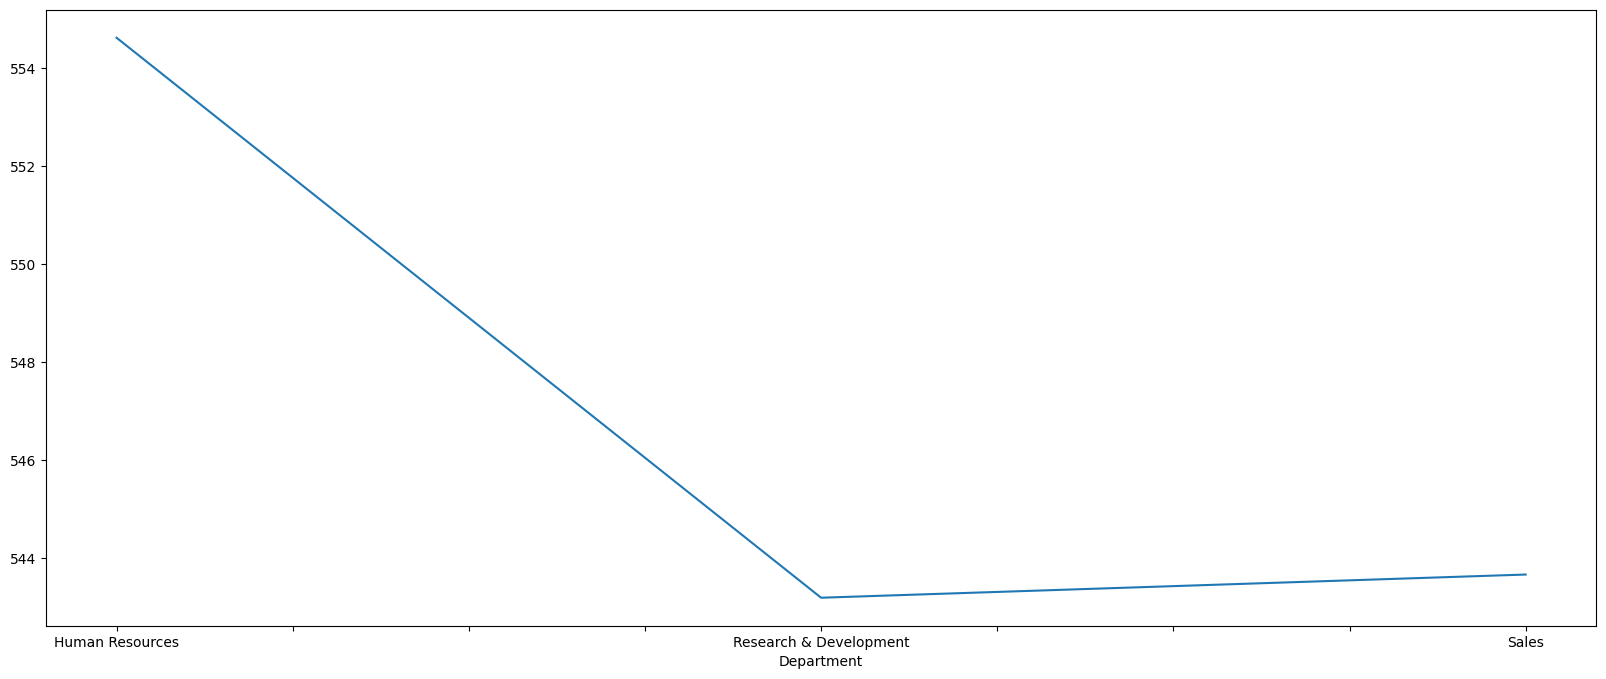

In [571]:
plt.figure(figsize=(20,8))
supp_department = Overtime.groupby('Department')['AverageHoursPerDay'].mean().plot()


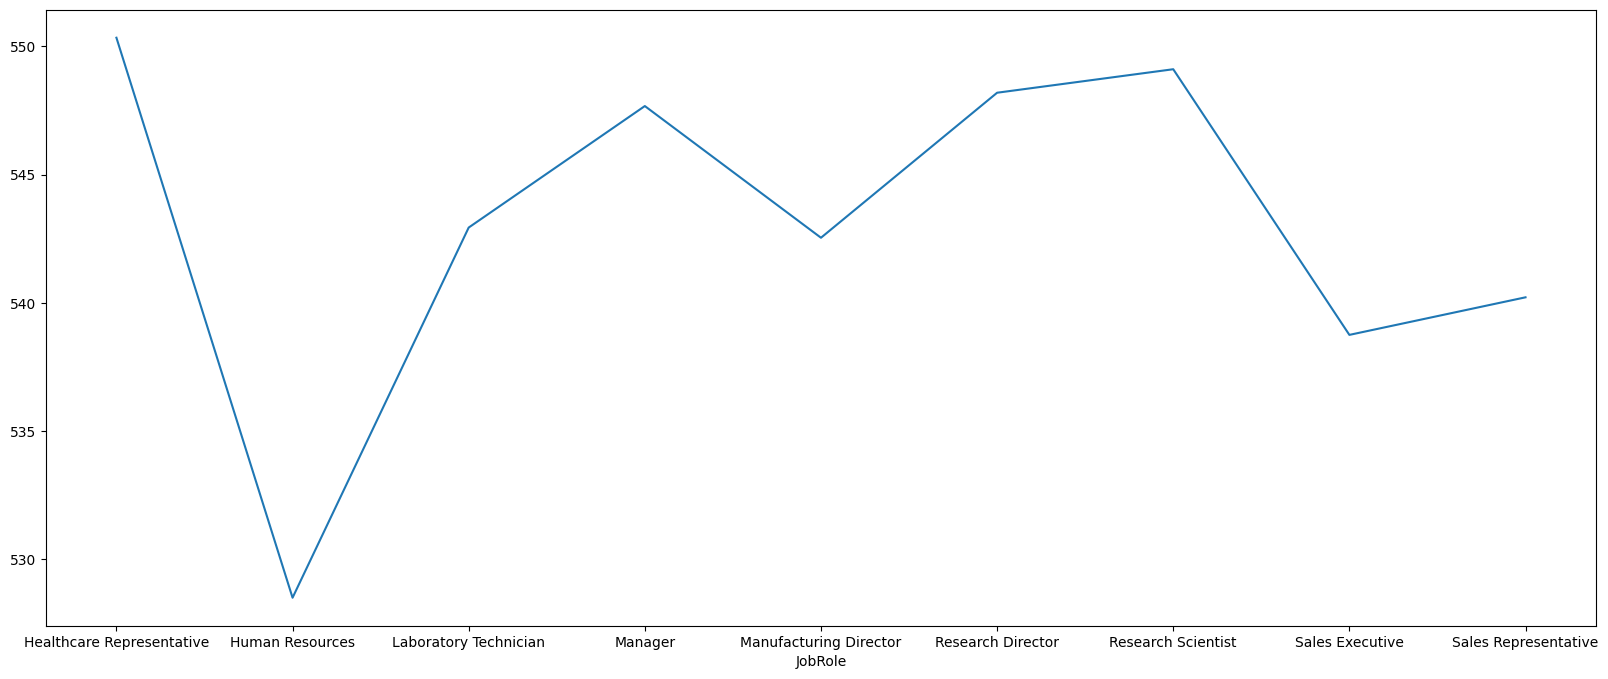

In [572]:
plt.figure(figsize=(20,8))
supp_jobrole = Overtime.groupby('JobRole')['AverageHoursPerDay'].mean().plot()


In [573]:
print(Overtime.groupby('Department')['AverageHoursPerDay'].mean())

Department
Human Resources           554.621622
Research & Development    543.187908
Sales                     543.661224
Name: AverageHoursPerDay, dtype: float64


JOB SATISFACTION FOR OVERTIMERS

<Axes: xlabel='JobRole'>

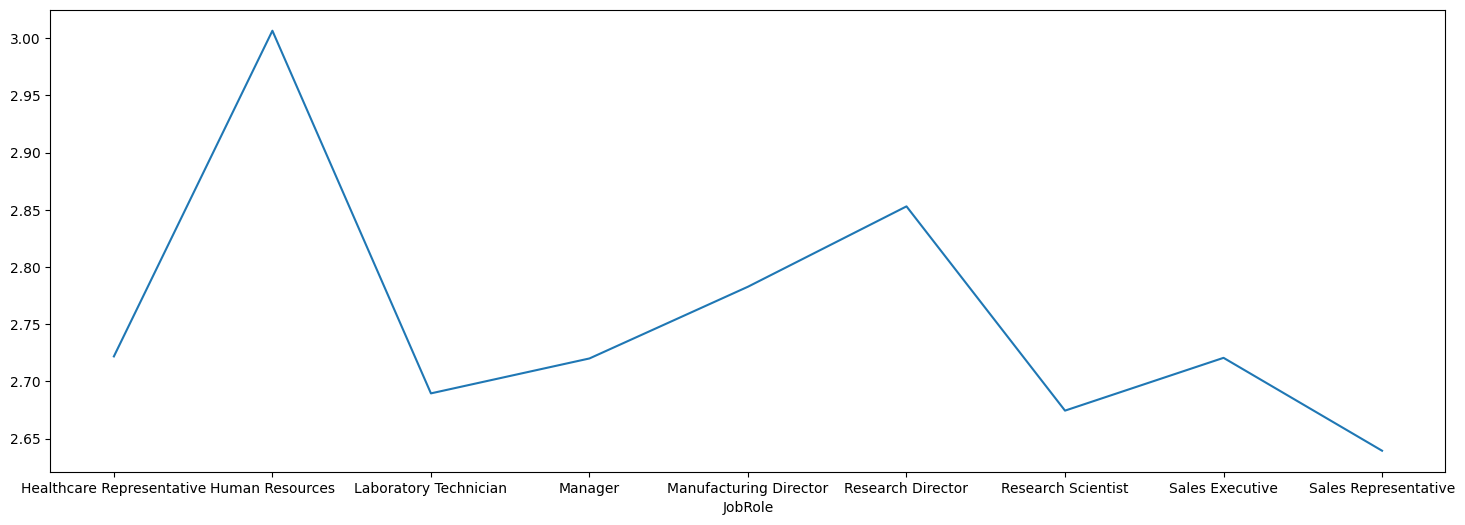

In [574]:
plt.figure(figsize=(18,6))
df_general_explo.groupby('JobRole')['JobSatisfaction'].mean().plot()

<Axes: xlabel='Department'>

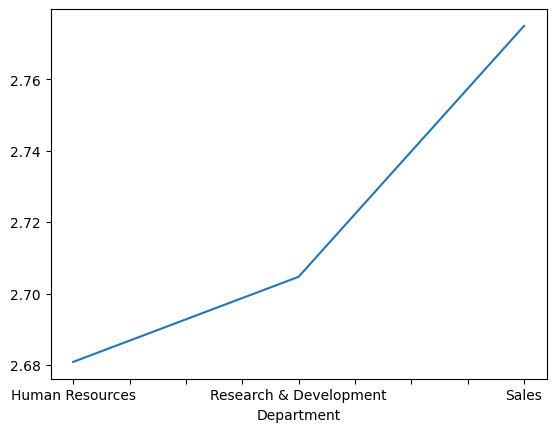

In [575]:
df_general_explo.groupby('Department')['JobSatisfaction'].mean().plot()

WORKLIFE BALANCE

<Axes: xlabel='Department'>

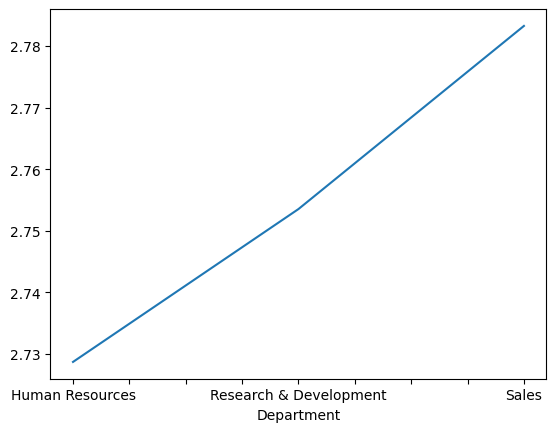

In [576]:
df_general_explo.groupby('Department')['WorkLifeBalance'].mean().plot()

<Axes: xlabel='JobRole'>

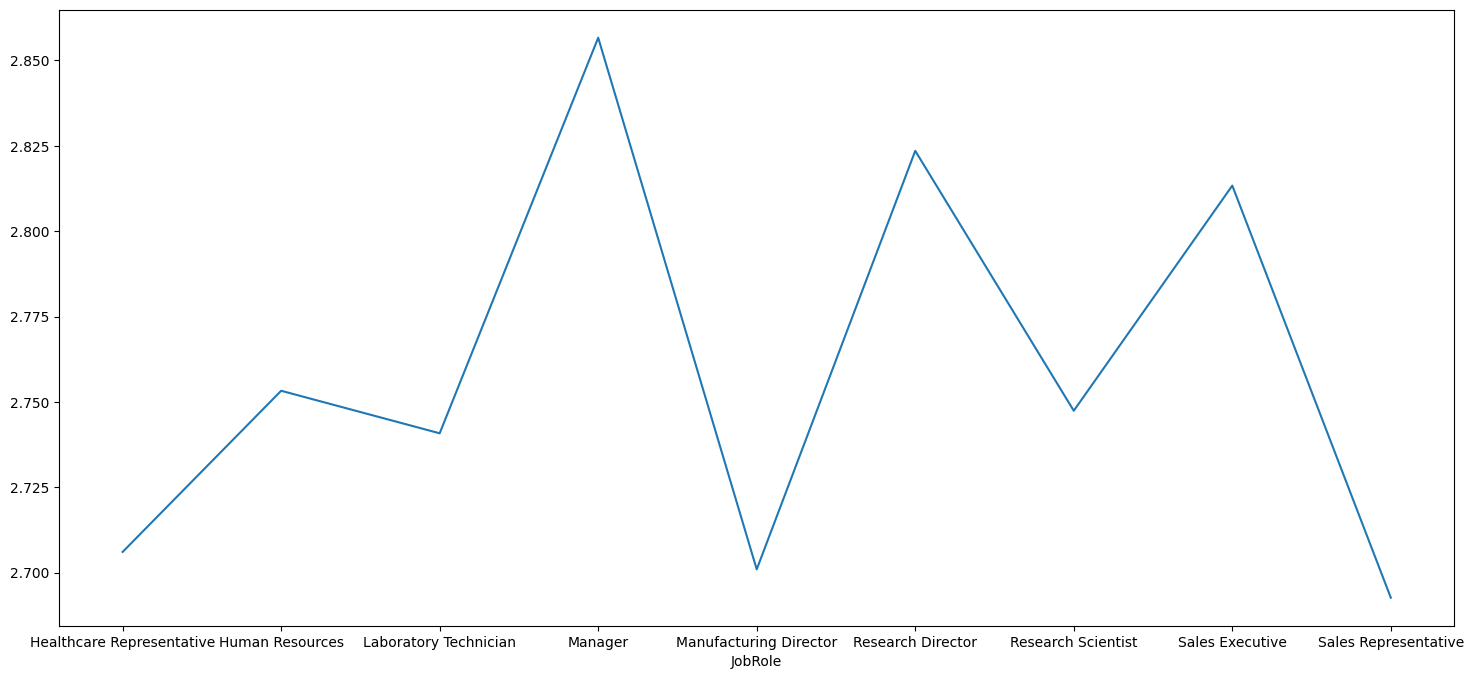

In [577]:
plt.figure(figsize=(18,8))
df_general_explo.groupby('JobRole')['WorkLifeBalance'].mean().plot()

EXPLO BUSINESS TRAVEL

In [578]:
yes_counts_travel_frequently = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Frequently']['Attrition'].value_counts().get('Yes', 0)
counts_travel_frequently = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Frequently']['Attrition'].count()
Percentage_of_Attrition=yes_counts_travel_frequently/counts_travel_frequently *100
Percentage_of_Attrition

24.785276073619634

In [579]:
yes_counts_travel_frequently2 = df_general_explo[df_general_explo['BusinessTravel'] == 'Non-Travel']['Attrition'].value_counts().get('Yes', 0)
counts_travel_frequently2 = df_general_explo[df_general_explo['BusinessTravel'] == 'Non-Travel']['Attrition'].count()
Percentage_of_Attrition2=yes_counts_travel_frequently2/counts_travel_frequently2 *100
Percentage_of_Attrition2

8.144796380090497

In [580]:
yes_counts_travel_frequently3 = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Rarely']['Attrition'].value_counts().get('Yes', 0)
counts_travel_frequently3 = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Rarely']['Attrition'].count()
Percentage_of_Attrition3=yes_counts_travel_frequently3/counts_travel_frequently3 *100
Percentage_of_Attrition3

15.081433224755699

In [232]:
df_general_explo.groupby('BusinessTravel')['Attrition'].value_counts()


BusinessTravel     Attrition
Non-Travel         No            406
                   Yes            36
Travel_Frequently  No            613
                   Yes           202
Travel_Rarely      No           2607
                   Yes           463
Name: count, dtype: int64

EXPLOOOOOOOOOOOOO